In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd 
import simple_twitter_learning as stl
import re

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /home/jonas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jonas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* download data

In [3]:
%%bash

if [ ! -e 'dataset_sentiment.csv' ]
then
    echo "downloading dataset"
    wget https://raw.githubusercontent.com/SmartDataAnalytics/MA-INF-4222-NLP-Lab/master/2018_SoSe/exercises/dataset_sentiment.csv
else
    echo "dataset already downloaded"
fi

dataset already downloaded


In [4]:
df = pd.read_csv('dataset_sentiment.csv')
df = df[['text','sentiment']]

In [5]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: x.replace('rt',' '))
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))
df.head()

text sentiment
0    nancyleegrahn how did everyone feel about th...   Neutral
1    scottwalker didnt catch the full gopdebate l...  Positive
2    tjmshow no mention of tamir rice and the gop...   Neutral
3    robgeorge that carly fiorina is trending  ho...  Positive
4    danscavino gopdebate w realdonaldtrump deliv...  Positive

In [6]:
neg = np.array([df['sentiment'][i] == 'Negative' for i in range(df.shape[0])])
pos = np.array([df['sentiment'][i] == 'Positive' for i in range(df.shape[0])])
neu = np.array([df['sentiment'][i] == 'Neutral' for i in range(df.shape[0])])

text = np.array(df['text'].tolist())

* load pipeline

In [7]:
pipeline_file = "/home/jonas/Dokumente/NLP_DATA/python_dumps/pipelines/tfidf_final/final_epoch01.pipeline"
pm = stl.pipeline_manager.load_from_pipeline_file(pipeline_file)

* plot statements

In [8]:
top_20 = list("😳😋😀😌😏😔😒😎😢😅😁😉🙌🙏😘😊😩😍😭😂")
top_20_sents = stl.emoji2sent(top_20)

pred_pos = pm.predict(text[pos])
pred_neg = pm.predict(text[neg])
pred_neu = pm.predict(text[neu])

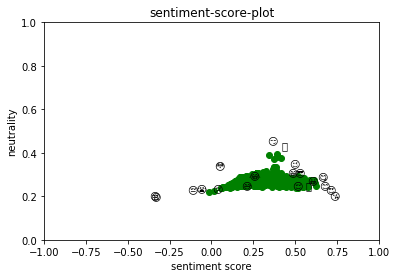

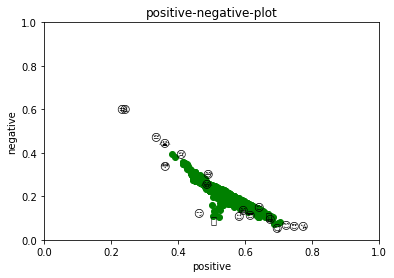

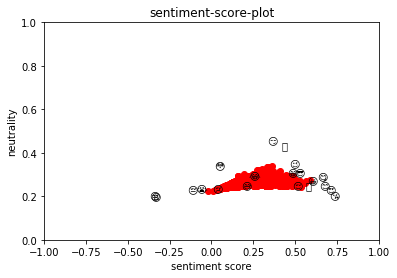

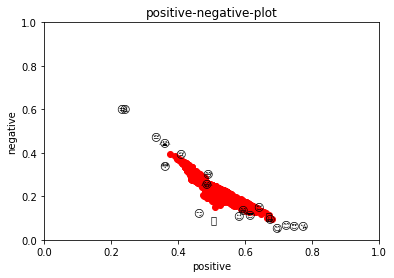

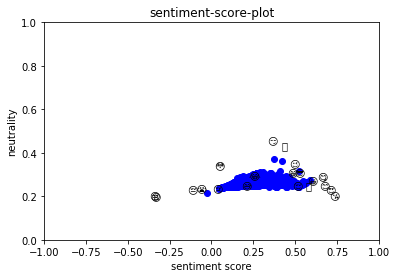

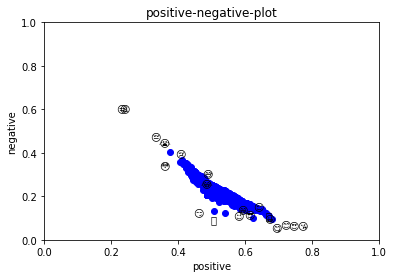

In [9]:
stl.plot_sentiment_space(predicted_sentiment_vectors=pred_pos, top_sentiments=top_20_sents, top_emojis=top_20, style='go')
stl.plot_sentiment_space(predicted_sentiment_vectors=pred_neg, top_sentiments=top_20_sents, top_emojis=top_20, style='ro')
stl.plot_sentiment_space(predicted_sentiment_vectors=pred_neu, top_sentiments=top_20_sents, top_emojis=top_20, style='bo')